# Проект распознования лица

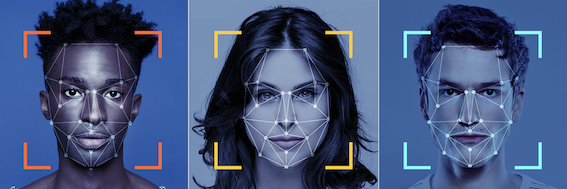

В этом проекте вы погрузитесь в структуру распознавания лиц и обучите нейронную сеть для задачи распознавания лиц, поиграетесь с потерями и метриками.

Мы обучим нейронную сеть на наборе данных [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

Как вы видите на сайте, изображения набора данных **СelebA** выглядят следующим образом:


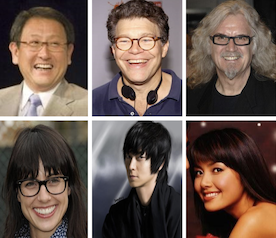

Но мы не будем обучать нейронную сеть для распознавания лиц на этих изображениях. Сначала нам нужно будет их предварительно обработать. Давайте посмотрим, зачем нам это нужно и как нам нужно их предварительно обработать.

Давайте рассмотрим, как работают системы распознавания лиц:

## Обучение модели распознавания лиц и настройка вывода

В этом разделе описывается, как обучаются модели распознавания лиц, что такое выравнивание данных и как выглядит вывод модели распознавания лиц.

### Обучение модели

Для обучения модели распознавания лиц на любом наборе данных лиц изображения должны быть сначала выровнены. Этот шаг очень важен для достижения хорошего качества распознавания лиц.

Что такое выравнивание: оно состоит из трех шагов:
1. Дано изображение, идентифицируем ориентиры лица на изображении (координаты точек глаз, носа и рта). Здесь может быть использована отдельная нейронная сеть, обученная определять ориентиры на изображениях лиц. Вы можете обратиться к [учебнику PyTorch Landmarks](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html), чтобы увидеть, как это работает.
2. Поверните все изображения в наборе данных так, чтобы глаза человека на каждом изображении лежали на определенной предопределенной горизонтальной линии.
3. Масштабируйте все изображения в наборе данных так, чтобы размер лиц был примерно одинаковым.

Вот пример того, что мы получим после выравнивания всех изображений Аарона Пирсола из нашего набора данных:

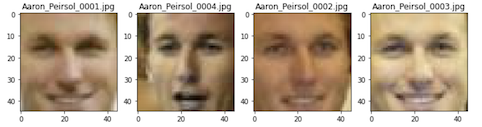

Вы видите, что глаза всех лиц лежат на одной горизонтальной линии, и все лица имеют почти одинаковый размер. Если мы выровняем все изображения в наборе данных, то мы можем обучить нейронную сеть на выровненных изображениях.

**Зачем нужна процедура выравнивания**: выравнивание всех лиц в наборе данных упрощает задачу распознавания лиц для модели. Если все лица, которые видит модель, имеют одинаковый размер и имеют свои ориентиры (глаза, нос и т. д.) на почти одних и тех же частях изображений, модели легче научиться идентифицировать человека на изображении. Модели не нужно «искать» положение лица и глаз на изображении перед выполнением распознавания.

Если вам интересно, вы также можете обучить модель на невыровненных изображениях, но вы увидите, что она будет работать плохо. Однако возможно обучить модель распознаванию лиц без предварительного выравнивания всех лиц, но для этого потребуется огромное количество данных — больше, чем есть почти у любой компании. Единственная компания, которая открыто представила свою систему распознавания лиц, не требующую специального выравнивания, — это Facebook — их нейронная сеть была обучена на действительно огромном количестве данных с использованием специального трюка, чтобы избежать выравнивания. Более подробную информацию можно прочитать [здесь](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Модель вывода

Давайте посмотрим, как можно использовать в реальном мире обученную на выровненных лицах модель:

Предположим, что вы владелец компании и хотите создать систему распознавания лиц для своего рабочего офиса. Вы решили повесить несколько камер по всему офису и хотите, чтобы они могли распознавать лица всех ваших сотрудников, когда они сидят/ходят по офису (мы позволяем вам самим решать, зачем вам нужна такая система в вашем офисе)

Система распознавания лиц обычно состоит из 3 этапов:
- обнаружение лиц
- выравнивание лиц
- распознавание лиц

Давайте рассмотрим их подробнее:

**Обнаружение лиц**

Когда камера висит на стене, она записывает видео и разделяет его на отдельные изображения, например:

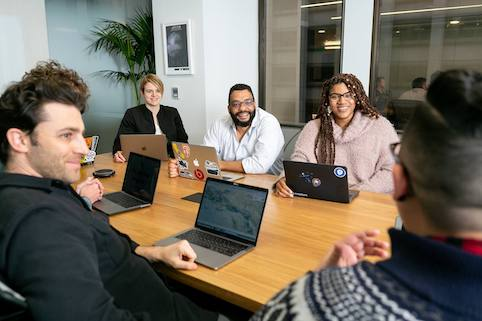

Чтобы распознать все лица на фотографии, вам сначала нужно обнаружить все лица, присутствующие на фотографии, например так:

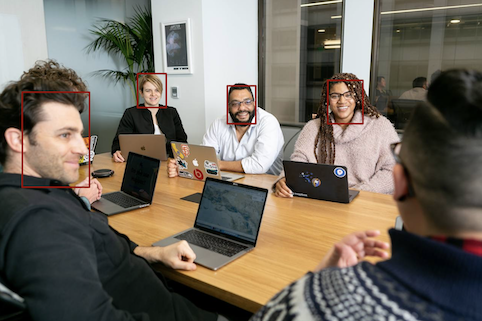

Это первая часть — обнаружение. Для этого можно использовать любую нейронную сеть, которая может обнаруживать людей.

**Выравнивание лиц**

Второй этап — выравнивание всех найденных лиц. Процедура выравнивания здесь должна быть такой же, как и для выравнивания обучающих изображений.

Таким образом, мы получим изображение парня на фотографии, выровненное следующим образом:

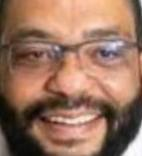

**Распознавание лиц**

На третьем этапе мы используем нейронную сеть, которую мы обучили распознавать лица.

Вот как работает конвейер моделей распознавания лиц. Вы также можете прочитать об этом больше по [этой ссылке](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (и используя поиск в интернете)

## Архитектура модели нейронной сети

Давайте обсудим, как должна выглядеть модель распознавания лиц.



Самый простой и, на самом деле, наиболее используемый способ создания нейронной сети для распознавания лиц — это создание ее в виде **простого классификатора**.

Предположим, у нас есть набор данных с фотографиями N разных людей. Тогда мы можем построить нейронную сеть для классификации всех изображений из набора данных в N классов. Каждый класс относится к одному уникальному человеку в наборе данных.

**Как же тогда мы распознаем новых людей с помощью этой сети?** На самом деле мы хотим, чтобы сеть для распознавания лиц могла распознавать не только людей, которые есть в обучающем наборе, но и почти каждого человека в мире.

Вот как: после обучения модели мы отбросим ее последний классификационный слой. После этого, когда мы пропустим изображение человека через сеть, мы получим выход предпоследнего слоя — это **внедрение изображения**. Имея вложения двух разных изображений, мы можем сравнить их с помощью **косинусного расстояния**. Чем меньше расстояние, тем выше вероятность того, что эти две фотографии принадлежат одному человеку.

Используя эту технику, мы можем получить вложения каждого изображения — даже невидимых людей, сравнить их и выявить изображения, принадлежащие одним и тем же людям.

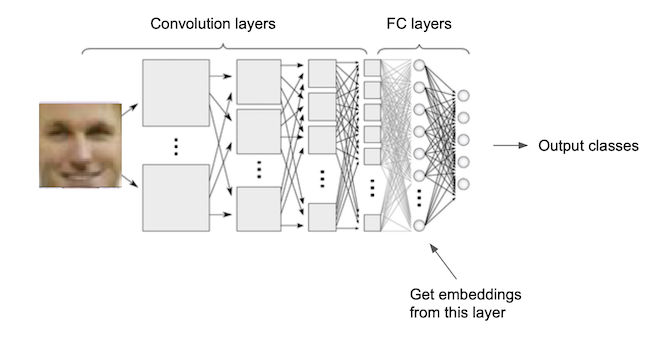

## Задание 1 (30% баллов): построить нейронную сеть для классификации лиц, как описано выше.

### Набор данных

Мы обучим сеть распознавания лиц на части [набора данных CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). Мы будем использовать версию, в которой все изображения выровнены. Вы можете загрузить набор данных по ссылкам:
- (весь набор данных celebA) [набор данных с 10177 классами](https://drive.google.com/file/d/1R-J71aJ50ahF-PkmaytLDyvbAiCccQdl/view?usp=sharing)
- [набор данных с 1000 классами](https://drive.google.com/file/d/1JT9CMGjIbO7LtUuh8IYRc2OYrY0lGy5r/view?usp=sharing)

**Важно**: изображения в обоих наборах данных выровнены, но не обрезаны. Для обрезки изображений есть файлы с координатами bboxes для каждого изображения в обоих наборах данных

Наилучший результат получается без bbox-а. Поэтому делаем вывод, что изображения центрированы и вырезаны

In [1]:
from PIL import Image
from IPython.display import display
# How to Show Images in Jupyter Notebook
# https://saturncloud.io/blog/how-to-show-images-in-jupyter-notebook/

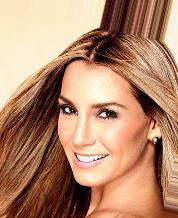

In [6]:
img = Image.open('./celebA_train_1k/celebA_imgs/000001.jpg')
display(img)

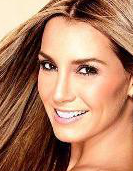

In [7]:
box = (20, 44, 153, 215)
img2 = img.crop(box)
display(img2)

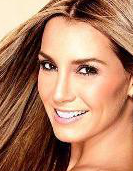

In [9]:
img2.save('myimage_cropped.jpg')
display(img2)

In [10]:
! rm myimage_cropped.jpg

Давайте сначала посмотрим на данные:

In [11]:
! ls ./celebA_train_1k/

celebA_anno_1k.txt  celebA_train_split.txt    Part_1
celebA_imgs	    clist_bbox_celeba_1k.txt



- celebA_imgs — папка с выровненными изображениями
- celebA_anno.txt — файл с аннотациями: какому человеку соответствует каждое изображение
- celebA_train_split.txt — файл с информацией о train/valid/test

In [12]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

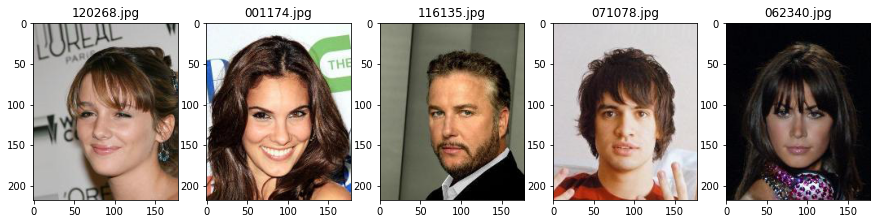

In [13]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('./celebA_train_1k/celebA_imgs', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

images_names = os.listdir('./celebA_train_1k/celebA_imgs')[:5]
show_imgs(images_names)


### Тренировка Нейронной Сети

Давайте создадим наборы данных и сеть, используя эти изображения:

In [14]:
def get_paths(dataset_type='train'):
    '''
    функция, которая возвращает список путей к изображениям для заданного набора данных:
      параметры -
      тип набора данных: один из «train», «val», «test»
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('./celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:
        images_paths.append(os.path.join('./celebA_train_1k/celebA_imgs', filename))

    return np.array(images_paths)


class celebADataset(Dataset):
    """Можем смело переписывать. Например, кэшировать все изображения в оперативной памяти,
    чтобы увеличить скорость обучения."""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('./celebA_train_1k/celebA_anno_1k.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:int(y) for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]

        image = Image.open(img_name)

        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }

        sample['image'] = self.transform(sample['image'])


        return sample

In [15]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

celeba_data = {}
celeba_data['train'], celeba_data['val'], celeba_data['test'] = train_data, val_data, test_data

dataset_sizes = {x: len(celeba_data[x]) for x in ['train', 'val', 'test']}


batch_size = 128
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True,
                                           num_workers=0, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

dataloaders = {}
dataloaders['train'] = train_loader
dataloaders['val'] = val_loader
dataloaders['test'] = test_loader

Мы будем использовать предварительно обученную на VGGFace2 сеть InceptionResnetV1 отсюда: https://github.com/timesler/facenet-pytorch/tree/master/models

In [ ]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 2.50 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [16]:
! ls models

inception_resnet_v1.py	mtcnn.py  __pycache__  utils


In [17]:
from models import inception_resnet_v1
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm.autonotebook import tqdm, trange

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [18]:
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)

**Рабочий процесс**: тонкая настройка модели на train_data с использованием val_data для проверки. Используйте стандартные потери (loss) CE. Рассчитайте потери (loss) и точность (accuracy) на тестовом наборе после обучения.

Вы можете использовать любой оптимизатор и любую скорость обучения. Также полезно заморозить начальные слои, чтобы повысить скорость обучения и избежать переобучения.

**Чтобы получить максимальную оценку за этот раздел, вам необходимо достичь 80% точности на тестовом наборе**.

In [19]:
# ВАШ КОД ЗДЕСЬ: настройте свою модель на тренировочном наборе и оцените ее на тестовом наборе
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, desc="Epoch:")


    for epoch in pbar:

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for data_dict in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                inputs = data_dict['image'].to(device)
                labels = data_dict['label'].to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]


            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc
                                ))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())



    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))


    model.load_state_dict(best_model_wts)
    return model


In [20]:
def evaluate_test(test_data, model, flag='test'):
    running_corrects = 0
    with torch.no_grad():
        for data_dict in test_data:
            inputs, labels = data_dict['image'].to(device), data_dict['label'].to(device)
            model.eval()

            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.data, 1)
            running_corrects += torch.sum(predicted == labels.data)
        test_accuracy = running_corrects.double() / dataset_sizes[flag]
    print(f'Accuracy on test set: {round(test_accuracy.item(), 2) * 100}%')

### Здесь мы просто пытаемся использовать предварительно обученную модель с одним коэфициентом скорости обучения learning rate (lr) на сеть, а во втором случае два разных lr для разных частей сети.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
best_model = train_model(model, criterion, optimizer_ft, exp_lr_scheduler, 10)

Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

Training complete in 13m 49s
Best val Acc: 0.899625


In [22]:
evaluate_test(test_loader, best_model)

Accuracy on test set: 89.0%


In [23]:
model_diff_lr = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)

optimizer = torch.optim.Adam(params=[
        {"params": list(model_diff_lr.parameters())[-100:]},
        {"params": list(model_diff_lr.parameters())[:-100], "lr": 1e-5,}
    ],
    lr=1e-4)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


best_model_dif_lr = train_model(model_diff_lr, criterion, optimizer, exp_lr_scheduler, 10)

Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/134 [00:00<?, ?it/s]

val iter::   0%|          | 0/30 [00:00<?, ?it/s]

Training complete in 13m 48s
Best val Acc: 0.916221


In [24]:
evaluate_test(test_loader, best_model_dif_lr)

Accuracy on test set: 90.0%


### Мы видим, что модель, в которой мы используем разные обучающие сети, в нашем случае лучше как на valid data, так и на test data.

In [25]:
torch.save(best_model_dif_lr.state_dict(), 'best_model.pt')

In [26]:
model.load_state_dict(torch.load('./best_model.pt', map_location='cpu'))

<All keys matched successfully>

**Расчет косинусного сходства**: удалить последний слой обученной сети. Получить вложения для некоторых изображений из обучающего набора и для изображений из тестового набора. Рассчитайте косинусное сходство между вложениями, соответствующими фотографиям одного и того же человека и разных людей. Велика ли разница в каком-либо из случаев?

In [27]:
import pandas as pd
# YOUR CODE HERE

# уберем последний слой
model.logits = nn.Sequential()


## Получим данные
def get_data(path):
    file = open(path, 'r')
    get_text = file.readlines()
    file.close()

    return get_text

annotations = get_data('./celebA_train_1k/celebA_anno_1k.txt')
train_test_split = get_data('./celebA_train_1k/celebA_train_split.txt')

## сделаем dataframe удобным к манипуляциям
def make_dataframe(ann, train_test):
    image_list = []
    class_list = []
    split_list = []
    for annotation, split in zip(ann, train_test):
        annotation = annotation.split()
        split = split.split()
        image_list.append(annotation[0])
        class_list.append(annotation[1])
        split_list.append(split[1])

    return pd.DataFrame({'image': image_list,
                        'class': class_list,
                        'train_val_test': split_list})

data = make_dataframe(annotations, train_test_split)
data.head()

,image,class,train_val_test
0,000001.jpg,0,0
1,000404.jpg,0,0
2,003415.jpg,0,0
3,004390.jpg,0,0
4,018062.jpg,0,0


In [28]:
#  выборка из df (взять только часть данных)
def sample_from_df(dataframe, is_train=True):
    if is_train:
        np.random.seed(42)

        classes = np.random.choice(np.arange(100), size=50,replace=False)
    else:
        np.random.seed(41)
        classes = np.random.choice(np.arange(100), size=50,replace=False)
    new_df = pd.DataFrame()
    for class_ in classes:
        if is_train:
            prom = data[(data['class'] == str(class_)) & (data['train_val_test'] == '0')]
            sample = prom.sample(n=1)
            new_df = pd.concat([new_df, sample])
        else:
            prom = data[(data['class'] == str(class_)) & (data['train_val_test'] == '2')]
            if len(prom) == 0:
                continue
            sample = prom.sample(n=1)
            new_df = pd.concat([new_df, sample])
    return new_df

train_sample = sample_from_df(data)
test_sample = sample_from_df(data, is_train=False)

In [29]:
# создать train_test_loaders
def get_train_test_loader(train_sample, test_sample, transformat, batch_size=50):
    train_image_list = []
    for img_name, class_name in zip(train_sample['image'].tolist(), train_sample['class'].tolist()):
        image = Image.open(os.path.join('./celebA_train_1k/celebA_imgs', img_name))
        train_image_list.append((transformat(image), class_name))

    test_image_list = []
    for img_name, class_name in zip(test_sample['image'].tolist(), test_sample['class'].tolist()):
        image = Image.open(os.path.join('./celebA_train_1k/celebA_imgs', img_name))
        test_image_list.append((transformat(image), class_name))

    train_loader = torch.utils.data.DataLoader(train_image_list, batch_size=50)
    test_loader = torch.utils.data.DataLoader(test_image_list, batch_size=50)

    return train_loader, test_loader


transform = transforms.Compose([
      # вы можете добавить что угодно, например, аугментацию (приращение, прирост)
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_loader, test_loader = get_train_test_loader(train_sample, test_sample, transform)

Подсказка - Вложения (embeddings) представляют собой объекты реального мира, такие как слова, изображения или видео, в форме, которую могут обрабатывать компьютеры.

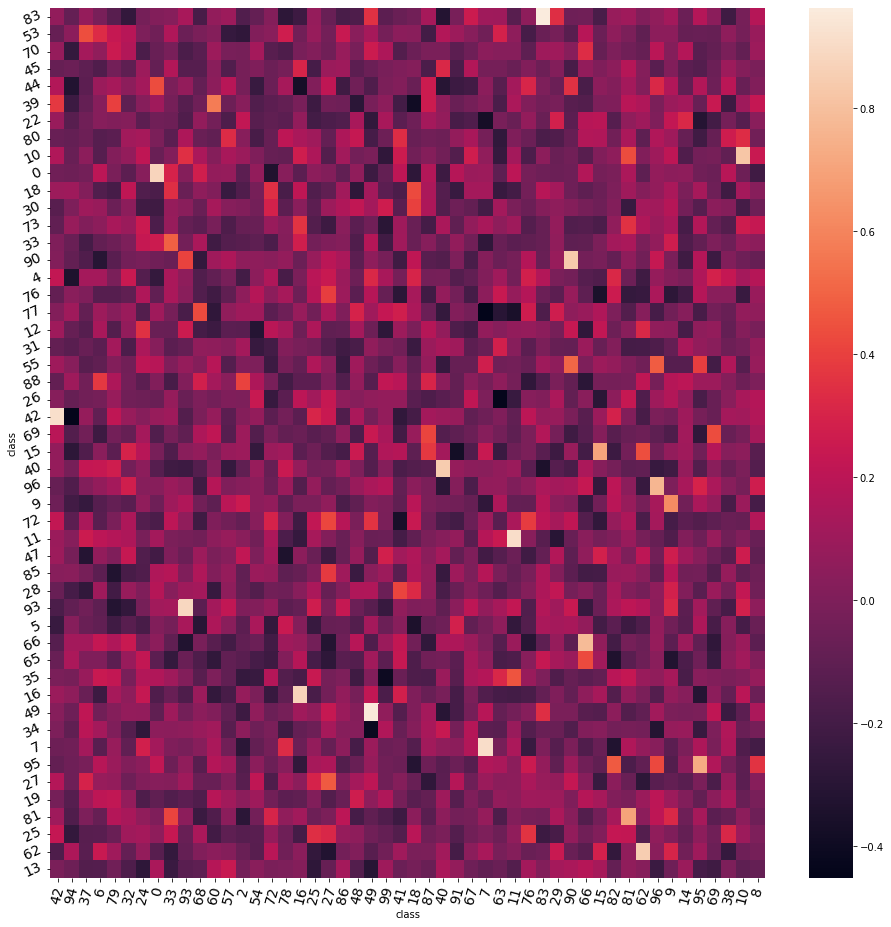

In [30]:
# создавать вложения (embedding) и подсчитывать косинусные сходства
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


def compute_similarities(model ,trainloader, testloader):
    with torch.no_grad():
        model.eval()
        for batch_train, label_train in train_loader:
            outputs_train = model(batch_train.to(device))
            for batch_test, label_test in test_loader:
                outputs_test = model(batch_test.to(device))
                cosine_data = cosine_similarity(outputs_train.cpu(), outputs_test.cpu())

    dataframe_cosine = pd.DataFrame(cosine_data, index=train_sample['class'], columns=test_sample['class'])

    return dataframe_cosine


similarity_matrix = compute_similarities(model, train_loader, test_loader)


plt.figure(figsize=(16,16))
sns.heatmap(similarity_matrix)
plt.yticks(size=14, rotation=25)
plt.xticks(size=14, rotation=75);

### На тепловой карте видно, как разные классы имеют более низкое косинусное сходство, в отличие от точек с одинаковыми классами (Например для классов 0-0, 42-42 и т.п параметр равен (от 0.7 и более)). Также мы можем видеть разные классы, но косинусное сходство относительно высокое (0.5-0.6) (Например для классов 62-32, 66-65 и т.п).

**Распределение сходства косинуса**: вычислите все сходства косинуса между изображениями в тестовом наборе данных и обучающем наборе данных одного и того же человека. Это означает, что если у вас есть изображение человека № 106 в тестовом наборе данных, вычислите все сходства между вложениями этого человека из тестового набора данных и вложениями этого человека из обучающего набора данных.

Затем сделайте это также для пар разных людей. Это означает, что если у вас есть изображение человека № 106 в тестовом наборе данных, вычислите сходства между вложениями этого человека из тестового набора данных и вложениями других людей из обучающего набора данных.

Это вычисление может занять много времени и памяти, так как это много пар. Вы можете сократить количество пар, между которыми вы вычисляете расстояния, до 5 тыс., например.

In [31]:
from tqdm.notebook import tqdm_notebook

In [32]:
# YOUR CODE HERE

#useful dict
def make_dict(data, num_of_classes):
    """создадим dict, где key - класс, value - список изображений, соответствующих его классу.
        Пример: {'0': [00012.jpg, 002213.jpg]}"""
    photos_dict = {}
    for i in tqdm_notebook(range(num_of_classes)):
        special_class = data[data['class'] == str(i)]
        only_train_test = special_class[(special_class['train_val_test'] == '0') | (special_class['train_val_test'] == '2')]
        photos_dict[i] = only_train_test['image'].tolist()

    return photos_dict

data_dict = make_dict(data, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [33]:
# подсчитать среднее количество embs на класс
def count_mean_embs(model, dict_with_data, path_to_photos):
    mean_embs_dict_per_class = {}
    for class_ , images_name_in_class in dict_with_data.items():

        images_transformed = [transform(Image.open(os.path.join(path_to_photos, img_name))) for img_name in images_name_in_class]

        with torch.no_grad():
            model.eval()
            embs = [model(img[None, :, :, :].to(device)) for img in images_transformed]
            embs = torch.stack(embs)

            mean_embs_per_class = torch.mean(embs, dim=0)

            mean_embs_dict_per_class[class_] = mean_embs_per_class

    return mean_embs_dict_per_class


mean_embs_dict = count_mean_embs(model, data_dict, './celebA_train_1k/celebA_imgs')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.109229,-0.111533,0.093199,-0.184614,0.053478,0.209746,0.118017,-0.055767,-0.177667
1,0.109229,1.000000,-0.116912,-0.245763,0.125927,0.197358,-0.041475,-0.155433,0.085092,-0.017575
2,-0.111533,-0.116912,1.000000,-0.010108,-0.276672,-0.000959,0.121471,-0.300076,-0.132849,0.197572
3,0.093199,-0.245763,-0.010108,1.000000,0.116035,-0.353997,0.058202,-0.005623,0.242296,-0.179868
4,-0.184614,0.125927,-0.276672,0.116035,1.000000,-0.125806,0.021908,-0.031844,0.407923,0.087070
5,0.053478,0.197358,-0.000959,-0.353997,-0.125806,1.000000,-0.064258,-0.044147,-0.189327,0.059446
6,0.209746,-0.041475,0.121471,0.058202,0.021908,-0.064258,1.000000,-0.026307,-0.078329,-0.188588
7,0.118017,-0.155433,-0.300076,-0.005623,-0.031844,-0.044147,-0.026307,1.000000,-0.138444,-0.292655
8,-0.055767,0.085092,-0.132849,0.242296,0.407923,-0.189327,-0.078329,-0.138444,1.000000,-0.039772
9,-0.177667,-0.017575,0.197572,-0.179868,0.087070,0.059446,-0.188588,-0.292655,-0.039772,1.000000


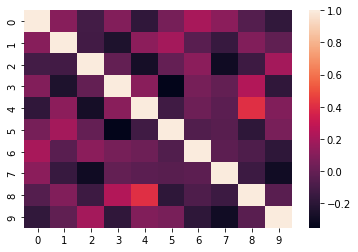

In [34]:
def cos_sim_matrix(mean_embed_dict, draw_heatmap=False):
    big_list = []
    for k, v in mean_embed_dict.items():
        new_list = []
        for k_2, v_2 in mean_embed_dict.items():
            cosine_sim = cosine_similarity(v.cpu(), v_2.cpu())
            new_list.append(cosine_sim[0][0])

        big_list.append(new_list)

    if draw_heatmap:
        sns.heatmap(pd.DataFrame(big_list))

    return pd.DataFrame(big_list)


cos_sim_matrix(mean_embs_dict, True)

### Мы видим распределение 10 классов. Одни и те же классы имеют высокое сходство (1) ,в отличие от разных классов (низкое < 0.4). Это логично

## Задача 2 (20% баллов): Метрика скорости идентификации

# При обучении модели выше мы использовали потерю CE на валидационном и тестовом наборе данных в качестве меры производительности нашей модели. Но это имеет большой недостаток: мы не можем измерить, как модель будет работать на невидимых лицах (которые отсутствуют в обучающем, проверочном и тестовом наборах данных)

Чтобы решить эту проблему, мы можем вычислить еще одну метрику для модели: **коэффициент идентификации**. Вот как это работает:

У нас есть два набора лиц: набор данных запроса и дистракторы (отвлекающие факторы) (query and distractors). Ни одно из лиц из этих наборов не присутствует в обучающем, проверочном или тестовом наборах.

1. вычислить косинусное сходство между всеми лицами, соответствующими одним и тем же людям из набора данных запроса. Это означает, что если у человека есть 3 фотографии в части запроса: 01.jpg, 02.jpg, 03.jpg, то вычислить 3 косинусных сходства между каждой парой вложений, соответствующих этим фотографиям.
2. вычислить косинусное сходство между всеми лицами, соответствующими разным людям из набора данных запроса - дистракторы.
3. вычислить косинусные сходства между всеми парами вложений, соответствующих запросу и дистракторам. Это означает вычислить сходства между парами (q, d), где q — вложение, соответствующее лицу из запроса, d — вложение, соответствующее лицу из дистракторов. Вы получите сходства |запрос|*|дистракторы|.
4. Сложить количество сходств из 2 и 3 этапов. Это количество ложных пар.
5. исправить **FPR** (коэффициент ложных срабатываний). Пусть в нашем случае это будет 0.01. FPR, умноженное на количество ложных пар из этапа 4, — это количество ложных срабатываний, которые мы позволим сделать нашей модели. Назовем это число N
6. Отсортировать все сходства ложных пар по убыванию. Получить N-й элемент с начала — это наше **пороговое сходство**.
7. Рассчитайте, сколько положительных сходств из этапа 1 равны или больше порогового значения. Разделите это число на целое число положительных сходств из этапа 1. Это TPR (истинно положительный показатель) — наша метрика.

Эту метрику также можно выразить как TPR@FPR=0.01. FPR может варьироваться.

Наборы данных (фотографии запросов, метки запросов и фотографии диструкторов) можно скачать здесь: https://disk.yandex.ru/d/C54mClLmQkag6Q

**Задача**: реализовать метрику TPR@FPR. Рассчитайте ее для своей модели и протестируйте набор данных на FPR=[0.5, 0.2, 0.1, 0.05].

Есть некоторые предопределенные функции и некоторые тесты для лучшего понимания. Пожалуйста, не изменяйте прототипы функций, чтобы вы могли использовать утверждения для проверки.

In [35]:
from models import inception_resnet_v1
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from tqdm.notebook import tqdm_notebook
import itertools
import pandas as pd
import torch
import os
import numpy as np


#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)

In [36]:
# файл с аннотациями части запроса: какое изображение принадлежит какому классу
# format:
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# Простой список имен изображений из запроса. Необходимо вычислить вложения для запроса
query_img_names = [x[0] for x in query_lines]

# dictionary словарь с информацией о том, какие изображения из запроса относятся к какому классу
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
  query_dict[img_class].append(img_name)

# список distractor изображений
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors')

In [37]:
def compute_embeddings(model, images_list, query=True):
    '''
    вычислить вложения из обученной модели для списка изображений.
        параметры:
          model: обученная nn-модель, которая берет изображения и выводит вложения
          images_list: список путей изображений для вычисления вложений для
        вывод:
          list: список вложений модели. Каждое вложение соответствует изображениям
          имен из images_list
    '''
    emb_list = []
    if query:
        path = './celebA_ir/celebA_query'
    else:
        path = './celebA_ir/celebA_distractors'
    with torch.no_grad():
        model.eval()
        for image_name in tqdm_notebook(images_list):
            image = transform(Image.open(os.path.join(path, image_name)))
            output = model(image[None, :, :, :].to(device))
            emb_list.append(output)
    return emb_list

In [38]:
%%time
query_embeddings = compute_embeddings(model, query_img_names, query=True)
distractors_embeddings = compute_embeddings(model, distractors_img_names, query=False)

  0%|          | 0/7198 [00:00<?, ?it/s]

  0%|          | 0/23397 [00:00<?, ?it/s]

CPU times: user 1h 35min 33s, sys: 1min 26s, total: 1h 36min 59s
Wall time: 12min 7s


### Q_D embeddings

In [39]:
import pickle

In [40]:
with open('query_embs.pkl', 'wb') as f:
    pickle.dump(query_embeddings, f)

with open('distractors_embs.pkl', 'wb') as f:
    pickle.dump(distractors_embeddings, f)

In [41]:
with open('query_embs.pkl', 'rb') as f:
    query_embeddings = pickle.load(f)

with open('distractors_embs.pkl', 'rb') as f:
    distractors_embeddings = pickle.load(f)

In [42]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
    '''
    вычислить косинусные сходства между положительными парами из запроса (этап 1)
    параметры:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}.
        Ключ: класс в наборе данных. Значение: изображения, соответствующие этому классу
    query_img_names: список имен изображений
    query_embeddings: список вложений, соответствующих query_img_names
    output:
    list of floats: сходства между вложениями, соответствующими
        тем же людям из списка запросов
    '''
    cosine_query_pos = []

    next_ = 0
    prev = 0

    for class_, img_names in tqdm_notebook(query_dict.items()):
        num = len(img_names)
        next_ += num
        class_embs = query_embeddings[prev:next_]
        prev = next_

        combs = itertools.combinations(class_embs, 2)

        for pair in combs:
            similarity = cosine_similarity(np.array(pair[0]).reshape(-1, 1).T, np.array(pair[1]).reshape(-1, 1).T)
            cosine_query_pos.append(similarity[0][0])

    return cosine_query_pos

def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
    '''
    вычислить косинусные сходства между отрицательными парами из запроса (этап 2)
    параметры:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}.
            Ключ: класс в наборе данных. Значение: изображения, соответствующие этому классу
    query_img_names: список имен изображений
    query_embeddings: список вложений, соответствующих query_img_names
    output:
    list of floats: сходства между вложениями, соответствующими
                    разным людям из списка запросов
    '''
    embeddings_df = pd.DataFrame()
    class_list = []
    next_ =  0
    prev = 0
    for class_, image_list in tqdm_notebook(query_dict.items()):
        class_list.append(class_)

        num = len(image_list)
        next_ += num
        class_embs = query_embeddings[prev:next_]
        prev = next_
        for image_name, emb in zip(image_list, class_embs):
            #print(emb.shape)
            index = pd.MultiIndex.from_tuples([(class_, image_name)], names=['class', 'Img_name'])
            #print(np.array(emb).reshape(-1, 1).T.shape)
            prom_df = pd.DataFrame(np.array(emb).reshape(-1, 1).T, index=index)
            embeddings_df = pd.concat([embeddings_df, prom_df])

    properly_df = pd.DataFrame(cosine_similarity(embeddings_df), index=embeddings_df.index, columns=embeddings_df.index)

    sorted_df = properly_df.reindex(sorted(properly_df.columns), axis=1).sort_index(axis=0)
    #print(sorted_df)
    for i in tqdm_notebook(list(sorted(class_list))):
        for j in list(sorted(class_list)):
            if i == j or i > j:
                sorted_df.loc[i, j] = 0
            else:
                continue

    numpy_flattened_cos = sorted_df.to_numpy().flatten()
    filterr = (numpy_flattened_cos != 0)

    stage_2_query_sim_between_class = numpy_flattened_cos[filterr].tolist()
    return stage_2_query_sim_between_class

def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
    '''
    вычислить косинусные сходства между отрицательными парами из запроса и дистрактора (отвлекающими факторами)
    (этап 3)
    параметры:
    query_embeddings: список вложений, соответствующих query_img_names
    distractors_embeddings: список вложений, соответствующих distractors_img_names
    output:
    list of floats: сходства между парами людей (q, d), где
                  q — вложение, соответствующее фото из запроса,
                  d — вложение, соответствующее фото из дистрактора
    '''
    stage_3_q_d_sim = cosine_similarity(query_embeddings, distractors_embeddings).flatten().tolist()

    return stage_3_q_d_sim

In [43]:
%%time
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names,
                                            query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names,
                                            query_embeddings)



  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 3min 21s, sys: 563 ms, total: 3min 21s
Wall time: 3min 18s


In [44]:
query_embeddings_3 = np.array([i.detach().numpy() for i in query_embeddings])
distractors_embeddings_3 = np.array([i.detach().numpy() for i in distractors_embeddings])

In [45]:
cosine_query_distractors = compute_cosine_query_distractors(distractors_embeddings_3.reshape(-1, 1000), query_embeddings_3.reshape(-1, 1000))

Проверьте код функций, вычисляющих сходство:

In [46]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names,
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names,
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings,
                                                            test_distractors_embeddings)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [47]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

Реализовать окончательную функцию: расчет скорости идентификации

In [48]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors,
               fpr=0.1):
    '''
    вычислить скорость идентификации с использованием заранее вычисленных косинусных сходств между парами
    при заданном fpr
    параметры:
    cosine_query_pos: косинусные сходства между положительными парами из запроса
    cosine_query_neg: косинусные сходства между отрицательными парами из запроса
    cosine_query_distractors: косинусные сходства между отрицательными парами
                              из запроса и отвлекающих факторов
    fpr: ложноположительная частота, при которой вычисляется TPR
    output:
    float: порог для заданного fpr
    float: TPR при заданном FPR
    '''
    false_pairs = len(cosine_query_neg) + len(cosine_query_distractors)
    N = int(false_pairs * fpr)
    total = cosine_query_neg + cosine_query_distractors
    sorted_total = list(sorted(total))[::-1]
    threshold = np.array(sorted_total)[N]
    cosine_query_pos = np.array(cosine_query_pos)
    mask = (cosine_query_pos >= threshold)
    return threshold, cosine_query_pos[mask].shape[0] / cosine_query_pos.shape[0]

Проверить себя:

In [49]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
  x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg,
                    test_cosine_query_distractors, fpr=fpr)
  test_thr.append(x)
  test_tpr.append(y)

In [50]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

Наконец, вычисляем tpr для набора данных запросов лиц и отвлекающих факторов и fpr = [0.5, 0.2, 0.1, 0.05]:

In [51]:
test_thr = []
test_tpr = []
for fpr in tqdm_notebook([0.5, 0.2, 0.1, 0.05]):
    x, y = compute_ir(cosine_query_pos, cosine_query_neg,
                    cosine_query_distractors, fpr=fpr)
    test_thr.append(x)
    test_tpr.append(y)

  0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
print('Thresholds for given FPR',test_thr)
print('TPR', test_tpr)

Thresholds for given FPR [0.07809174060821533, 0.2222440242767334, 0.3015110492706299, 0.3680623173713684]
TPR [0.9805513085709147, 0.9339868693227809, 0.8845557154420362, 0.8257599604280961]


### В экспериментах у нас получилось тем выше TPR, чем ниже threshold, что вполне ожидаемо. Можно сказать, что если наш порог около 0.5 (косинусное сходство) и выше, мы получим около 80% TPR.

## Задача 3 (50% баллов): Функции потерь

При построении сети на задаче 1 мы использовали обычную функцию потерь CE. Но есть еще много вариантов функций потерь, которые можно использовать для обучения нейронной сети. Мы рассмотрим две из них, которые являются наиболее популярными. Больше примеров потерь для распознавания лиц и обзоров их производительности вы можете найти в этой статье: https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss (25% points)

Это еще один вид потерь, который не требует, чтобы модель имела последний классификационный слой — он работает напрямую с вложениями. Он требует по замыслу, чтобы вложения одного человека были близки в пространстве вложений, а вложения разных людей были далеко друг от друга.

Эта потеря имеет преимущество перед потерями типа CE: она не зависит от количества классов в наборе данных. Если у нас есть новые лица новых людей в наборе данных, нам не нужно будет полностью переобучать сеть, мы можем просто настроить обученную сеть на новых фотографиях.


**Как работает TripletLoss**:

Здесь архитектура нейронной сети будет немного отличаться от той, которая была при использовании CE loss: в ней не будет последнего слоя классификации. Последний слой NN будет выводить вложения данной фотографии.

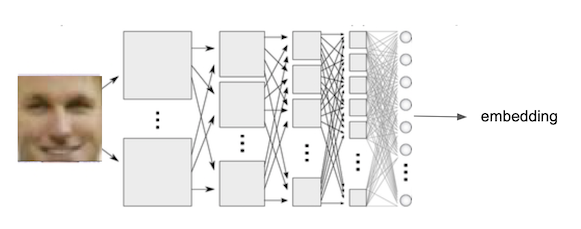

Функция TripletLoss работает напрямую с этими вложениями. Идея состоит в том, чтобы сделать вложения одних и тех же людей более близкими, компактными в пространстве вложений, а вложения разных людей — более раздельными. Есть формула для потерь:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

где
- $e$ — это вложение фотографии (выход модели)
- $p$ — это положительное вложение для фотографии (вложение, к которому мы хотим, чтобы $e$ был близок)
- $n$ — это отрицательное вложение для фотографии (вложение, от которого мы хотим, чтобы $e$ был далек)
- $d(x, y)$ — это мера расстояния между вложениями
- margin — положительное вложение для дальнейшего увеличения разницы между $d(a, p)$ и $d(a, n)$

**Все вложения $e$, $p$ и $n$ должны быть нормализованы перед передачей их в loss**.

В нашем случае для данной фотографии $E$ и ее вложения $e$ положительное вложение $p$ должно быть вложением фотографии того же человека, а вложение $n$ должно быть вложением фотографии другого человека.

Эту реализацию TripletLoss для PyTorch можно найти [здесь](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). Существуют различные варианты TripletLoss, которые также могут повысить производительность и которые вы можете реализовать самостоятельно, если хотите:
- использовать более 1 образца $p$ и $n$ для одного встраивания $e$
- использовать специальные виды отрицательных чисел: например, отрицательные числа, которые находятся ближе всего к e (чтобы повысить производительность, они должны быть дальше от e)

**More to read about TripletLoss**:

The idea of TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch implementation of TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Задание**: реализовать модель и обучить ее с помощью TripletLoss. Поиграйте с параметром margin, чтобы добиться лучших результатов.

Какой loss из тех, что вы пробовали, является лучшим?

**Чтобы получить максимальную оценку за это задание, вам нужно правильно обучить модель с помощью TripletLoss хотя бы для одного значения margin и достичь >=75% acc на тестовом наборе.**
Поскольку в нашей сети нет слоя классификации, нам нужна специальная процедура для расчета точности. Вы можете использовать одну из следующих процедур:
- вычислить точность на val и тестовых наборах с помощью KNN с вложениями из обучающего набора в качестве точек обучения. (простой способ)
- вычислить средние вложения для каждого класса из обучающего набора и использовать их в качестве опорных вложений. Затем для каждого вложения v из val и тестовых наборов вычислить косинусные сходства между v и средними вложениями из обучающего набора. (более «правильный» способ, но требует написания кода)

Вы можете использовать любой из этих двух вариантов.

**Подсказки**:
- подумайте, какой должна быть функция расстояния $d$ в нашем случае: обучая модель, мы хотим, чтобы она выводила вложения, которые можно сравнить с помощью функции косинусного сходства. Обратите внимание, что косинусное сходство не является мерой расстояния — чем больше косинусное расстояние, тем ближе вложения. Подумайте, как можно поместить косинусное расстояние в функцию TripletLoss.
- для обучения модели с использованием этой потери вам нужно будет переписать класс Dataset так, чтобы он давал вам не случайное изображение и его метку, а изображение, положительные изображения и отрицательные изображения для этого изображения;
- не забудьте нормализовать вложения для потери! Вы даже можете сделать это, добавив batchnorm/layernorm в последний слой вашей сети

In [53]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

In [54]:
## First, count mean embeddings for all classes.
from collections import defaultdict
import pickle
from models import inception_resnet_v1
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from tqdm.notebook import tqdm_notebook
import itertools
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
# load model for triplets
model_triplet = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=1000).to(device)
#model.load_state_dict(torch.load('best_model.pt', map_location='cpu'))

model_triplet.logits = nn.Sequential()

In [56]:
# получим данные и создадим их список
def get_data(path):
    file = open(path, 'r')
    get_text = file.readlines()
    file.close()

    return get_text
annotations = get_data('./celebA_train_1k/celebA_anno_1k.txt')
train_test_split = get_data('./celebA_train_1k/celebA_train_split.txt')
def_dict = defaultdict(list)

for ann, split in zip(annotations, train_test_split):
    img, class_ = ann.split()
    img_, split_ = split.split()
    if split_ == '0':
        def_dict[int(class_)].append(img)
    else:
        continue

In [57]:
path_to_photos = './celebA_train_1k/celebA_imgs'
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [58]:
# get mean embs

class_list = []
emb_list = []
for class_, images_name_in_class in tqdm_notebook(def_dict.items()):
    #print(class_, images_name_in_class)
    images_transformed = [transform(Image.open(os.path.join(path_to_photos, img_name))) for img_name in images_name_in_class]
    with torch.no_grad():
        model_triplet.eval()
        embs = [model_triplet(img[None, :, :, :].to(device)) for img in images_transformed]

        embs_stacked = torch.stack(embs)
        #print(embs_stacked.shape)
        mean_embs_per_class = torch.mean(embs_stacked, dim=0)
        class_list.append(class_)
        emb_list.append(mean_embs_per_class)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [59]:
with open('emb_list.pickle', 'wb') as f:
    pickle.dump(emb_list, f)

In [60]:
# load our mean embs
with open('emb_list.pickle', 'rb') as f:
    emb_list = pickle.load(f)

In [61]:

def get_paths(dataset_type='train'):
    '''
    функция, которая возвращает список путей к изображениям для заданного типа набора данных
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('./celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:
        images_paths.append(os.path.join('./celebA_train_1k/celebA_imgs', filename))

    return np.array(images_paths)

## rewrite celeba for Triplets
class celebADataset(Dataset):
    """Можете смело переписывать.
    Например, кэшировать все изображения в оперативной памяти, чтобы увеличить скорость обучения."""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.data_type = dataset_type
        f = open('./celebA_train_1k/celebA_anno_1k.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:int(y) for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug

        self.labels_set = set(np.array(self.labels))
        self.label_to_indices = {label: np.where(np.array(self.labels) == label)[0]
                                     for label in self.labels_set}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if self.data_type == 'train':
            img_name = self.images[idx]
            anchor_label = self.labels[idx]
            anchor_image = Image.open(img_name)

            positive_index = idx
            positive_label = anchor_label
            while positive_index == idx:
                positive_index = np.random.choice(self.label_to_indices[anchor_label])
                negative_label = np.random.choice(list(self.labels_set - set([anchor_label])))
                negative_index = np.random.choice(self.label_to_indices[negative_label])
            positive_img2 = Image.open(self.images[positive_index])
            negative_img3 = Image.open(self.images[negative_index])


            anchor_image = self.transform(anchor_image)
            positive_img2 = self.transform(positive_img2)
            negative_img3 = self.transform(negative_img3)

            return anchor_image, positive_img2, negative_img3, anchor_label, positive_label, negative_label
        else:
            img_name = self.images[idx]
            label = self.labels[idx]
            image = Image.open(img_name)

            trans_img = self.transform(image)

            return trans_img, label

In [62]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

train_loader_triplet = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader_triplet = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=False)
test_loader_triplet = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

dataloader_tr = {}
dataloader_tr['train'] = train_loader_triplet
dataloader_tr['val'] = val_loader_triplet
dataloader_tr['test'] = test_loader_triplet

In [63]:
from tqdm.autonotebook import tqdm, trange
from torch.nn import TripletMarginWithDistanceLoss
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

In [64]:
# отрегулируйте свою модель на тренировочном наборе и оцените ее на тестовом наборе
def train_model_triplet(model, criterion, optimizer, dataloader_tr, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, desc="Epoch:")

    epoch_loss = 0
    for epoch in pbar:

        total_loss = 0
        for anchor_img, pos_img, neg_img, anchor_lab, pos_lab, neg_lab in tqdm(
            dataloader_tr['train'], leave=False, desc=f"train iter:"):
            anchor_img, pos_img, neg_img = anchor_img.to(device), pos_img.to(device), neg_img.to(device)
            anchor_label, pos_label, neg_label = anchor_lab.to(device), pos_lab.to(device), neg_lab.to(device)


            optimizer.zero_grad()

            anchor_emb = model(anchor_img)
            pos_emb = model(pos_img)
            neg_emb = model(neg_img)


            loss = criterion(anchor_emb, pos_emb, neg_emb)
                # обнулить градиенты параметров
            loss.backward()

            total_loss += loss.item() * anchor_img.size(0)
            optimizer.step()



        epoch_loss = total_loss / len(dataloader_tr['train'])


        model.eval()

        with torch.no_grad():
            true_labels = []
            pred_labels = []


            for image, label in tqdm(dataloader_tr['val'], leave=False, desc=f"train iter:"):
                image, label = image.to(device), label.to(device)
            #print(label)
                val_img_emb = model(image)
                result = F.cosine_similarity(torch.stack(emb_list, dim=0).reshape(-1, 512), val_img_emb)
                true_labels.append(label.item())
                pred_labels.append(torch.argmax(result).item())


        val_epoch_accuracy = accuracy_score(true_labels, pred_labels)


        pbar.set_description('Epoch: {} Train Loss: {:.4f} Validation Acc: {:.4f}'.format(epoch, epoch_loss, val_epoch_accuracy))




            # deep copy the model
        if val_epoch_accuracy > best_acc:
            best_acc = val_epoch_accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [65]:
param_to_freeze = 20
for param in list(model_triplet.parameters())[:-param_to_freeze]:
    param.requires_grad = False

In [66]:
optimizer = torch.optim.Adam(list(model_triplet.parameters())[-param_to_freeze:], lr=0.0001)

criterion = TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - F.cosine_similarity(x, y), margin=0.4)

best_model = train_model_triplet(model_triplet, criterion, optimizer, dataloader_tr, num_epochs=10)

Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

Training complete in 28m 43s
Best val Acc: 0.756424


In [67]:
torch.save(best_model.state_dict(), 'best_model_triplet.pt')

In [68]:
model_triplet.load_state_dict(torch.load('best_model_triplet.pt'))

<All keys matched successfully>

In [69]:
model_triplet.eval()

with torch.no_grad():
    true_labels = []
    pred_labels = []


    for image, label in tqdm(dataloader_tr['test'], leave=False, desc=f"train iter:"):
        image, label = image.to(device), label.to(device)
            #print(label)
        val_img_emb = model_triplet(image)
        result = F.cosine_similarity(torch.stack(emb_list, dim=0).reshape(-1, 512), val_img_emb)
        true_labels.append(label.item())
        pred_labels.append(torch.argmax(result).item())

print(f'Test accuracy {round(accuracy_score(true_labels, pred_labels), 2)}')

train iter::   0%|          | 0/3174 [00:00<?, ?it/s]

Test accuracy 0.73


### model_triplet и TripletLoss дает меньшую точность, чем Стандартная. Недостаток TripletLoss заключается в их низкой скорости сходимости, а иногда и не сходимости. Нужно увеличивать время расчетов.

### ArcFace Loss (Additive Angular Margin Loss - Аддитивная угловая потеря запаса) (25% points)

Эта потеря является в некоторой степени "SOTA" для систем распознавания лиц (в некоторой степени — потому что на самом деле разные варианты потерь и их комбинации могут быть наилучшими для разных сетевых архитектур). Эта потеря наследует идею потери CE, но развивает ее дальше, чтобы достичь лучшего распределения вложений на сфере. Она вводит некоторые геодезические ограничения для улучшения внутриклассовой компактности и межклассового расхождения.



**Как работает потеря ArcFace**:

Эта потеря является разновидностью стандартной потери SoftMax CE, которая заставляет вложения разных классов (людей) быть дальше: иметь более разреженное представление вложений в пространстве вложений, обеспечивать более очевидный разрыв между ближайшими классами.

Стандартные потери SoftMax CE для задачи классификации представлены следующим образом:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

где:
- $x_i \in \mathbb{R^d}$ обозначает глубокий признак $i$-го образца, принадлежащий $y_i$-му классу;
- $W_j \in \mathbb{R^d}$ обозначает j-й столбец веса;
- $W \in \mathbb{R^d}$ и $b_j \in \mathbb{R^d}$ — это смещение;
- $N$ — размер партии;
- $n$ — номер класса.

Похоже, что, хотя эта потеря работает хорошо, она явно не оптимизирует встраивание признаков для обеспечения более высокого сходства для внутриклассовых образцов и разнообразия для межклассовых образцов, что приводит к разрыву в производительности для глубокого распознавания лиц при больших внутриклассовых вариациях внешности.

Давайте немного поработаем над этой формулой потери:
- исправим смещение $b_j=0$;
- нормализуем вес ||$W_j$|| = 1;
- нормализовать вложение ||$x_i$|| = 1 и перемасштабировать его до s (s — гиперпараметр)

Шаг нормализации вложений и весов делает предсказания зависящими только от угла между вложением и весом. Таким образом, изученные вложения распределяются по гиперсфере с радиусом s.

Таким образом, теперь мы получаем следующую функцию потерь:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Последний шаг: добавим аддитивный угловой штраф $m$ между $x_i$ и $W_{y_i}$, чтобы одновременно улучшить внутриклассовую компактность и межклассовое расхождение:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

У ArcFace loss 2 гиперпараметра: s и m.

The original paper to read about ArcFace more precisely: https://arxiv.org/pdf/1801.07698.pdf

The original repo, where you can find a code sample: https://github.com/deepinsight/insightface

**Задание**: реализовать модель и обучить ее с потерями ArcFace. Поиграйте с параметрами потерь ArcFace и посмотрите, сможете ли вы превзойти модель с потерями CE.

Чтобы получить полную оценку за это задание, вам нужно правильно обучить модель с использованием TripletLoss хотя бы для одного значения маржи и достичь >=75% acc на тестовом наборе.

In [70]:
import math
from torch.nn import Parameter

In [71]:
# YOUR CODE HERE
class AddMarginProduct(nn.Module):
    r"""
        Реализация большое запасное косинусное расстояние:
    Аргументы:
        in_features: размер каждого входного образца
        out_features: размер каждого выходного образца
        s: норма входного признака
        m: запас margin
        cos(theta) - m
    """

    def __init__(self, in_features, out_features, s=30.0, m=0.40):
        super(AddMarginProduct, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

    def forward(self, input, label):
        # --------------------------- cos(theta) & phi(theta) ---------------------------
        cosine = F.linear(F.normalize(input), F.normalize(self.weight.to(device)))
        phi = cosine - self.m
        # --------------------------- convert label to one-hot ---------------------------
        one_hot = torch.zeros(cosine.size(), device='cuda')
        # one_hot = one_hot.cuda() if cosine.is_cuda else one_hot
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)
        # -------------torch.where(out_i = {x_i if condition_i else y_i) -------------
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)  # you can use torch.where if your torch.__version__ is 0.4
        output *= self.s
        # print(output)

        return output

In [72]:
# YOUR CODE HERE
def get_paths(dataset_type='train'):
    '''
    функция, которая возвращает список путей к изображениям для заданного типа набора данных
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('./celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:
        images_paths.append(os.path.join('./celebA_train_1k/celebA_imgs', filename))

    return np.array(images_paths)


class celebADataset(Dataset):
    """Можете смело переписывать.
    Например, кэшировать все изображения в оперативной памяти, чтобы увеличить скорость обучения"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.data_type = dataset_type
        f = open('./celebA_train_1k/celebA_anno_1k.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:int(y) for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug

        self.labels_set = set(np.array(self.labels))
        self.label_to_indices = {label: np.where(np.array(self.labels) == label)[0]
                                     for label in self.labels_set}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_name)

        trans_img = self.transform(image)

        return trans_img, label

In [73]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

train_loader_arcface = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader_arcface = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=False)
test_loader_arcface = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

dataloader_arc = {}
dataloader_arc['train'] = train_loader_arcface
dataloader_arc['val'] = val_loader_arcface
dataloader_arc['test'] = test_loader_arcface

metric_fc = AddMarginProduct(512, 1000, s=15, m=0.1)

In [74]:
model_arcface = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=1000).to(device)
model_arcface.logits = nn.Sequential()

param_to_freeze = 20
for param in list(model_arcface.parameters())[:-param_to_freeze]:
    param.requires_grad = False

optimizer = torch.optim.Adam(list(model_arcface.parameters())[-param_to_freeze:], lr=0.0001)


criterion = torch.nn.CrossEntropyLoss()

In [75]:
# YOUR CODE HERE: fine-tune your model on train set and evaluate it on test set
def train_model_arcface(model, criterion, optimizer, loss_arc, dataloader_tr, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, desc="Epoch:")

    loss_optimizer_arc = torch.optim.AdamW(loss_arc.parameters(), lr=3e-4)
    epoch_loss = 0
    for epoch in pbar:

        total_loss = 0
        for img, label in tqdm(dataloader_tr['train'], leave=False, desc=f"train iter:"):
            image, label = img.to(device), label.to(device)

            if optimizer:
                optimizer.zero_grad()

            loss_optimizer_arc.zero_grad

            image_imb = model(image)



            feature = loss_arc(image_imb, label)
            #print(loss.shape)

            loss = criterion(feature, label)
            loss.backward()
                # обнулить градиенты параметров
            #loss.mean().backward()

            total_loss += loss.item() * img.size(0)

            if optimizer:
                optimizer.step()
            loss_optimizer_arc.step()



        epoch_loss = total_loss / len(dataloader_tr['train'])


        model.eval()

        with torch.no_grad():
            true_labels = []
            pred_labels = []


            for image, label in tqdm(dataloader_tr['val'], leave=False, desc=f"val iter:"):
                image, label = image.to(device), label.to(device)
            #print(label)
                val_img_emb = model(image)
                result = F.cosine_similarity(torch.stack(emb_list, dim=0).reshape(-1, 512), val_img_emb)
                true_labels.append(label.item())
                pred_labels.append(torch.argmax(result).item())


        val_epoch_accuracy = accuracy_score(true_labels, pred_labels)


        pbar.set_description('Epoch: {} Train Loss: {:.4f} Validation Acc: {:.4f}'.format(epoch, epoch_loss, val_epoch_accuracy))




            # deep copy the model
        if val_epoch_accuracy > best_acc:
            best_acc = val_epoch_accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [76]:
best_model_arcface = train_model_arcface(model_arcface, criterion, optimizer, metric_fc, dataloader_arc, num_epochs=10)

Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/3736 [00:00<?, ?it/s]

Training complete in 16m 32s
Best val Acc: 0.902570


In [77]:
best_model_arcface.eval()

with torch.no_grad():
    true_labels = []
    pred_labels = []


    for image, label in tqdm(dataloader_arc['test'], leave=False, desc=f"train iter:"):
        image, label = image.to(device), label.to(device)
            #print(label)
        val_img_emb = best_model_arcface(image)
        result = F.cosine_similarity(torch.stack(emb_list, dim=0).reshape(-1, 512), val_img_emb)
        true_labels.append(label.item())
        pred_labels.append(torch.argmax(result).item())

print(f'Test accuracy {round(accuracy_score(true_labels, pred_labels), 2)}')

train iter::   0%|          | 0/3174 [00:00<?, ?it/s]

Test accuracy 0.89


### Модель с Arcface loss дала тот же результат, что и модель с InceptionResnetV1 в начале. Около 90% при проверке и 88% при тестировании.

## Бонусное задание (5% баллов): Поиск мусорных фотографий

Вы, вероятно, заметили, что при расчете скорости идентификации мы используем косинусное сходство между вложениями, которое включает нормализацию вложений. И в TripletLoss мы также нормализуем вложения перед передачей их в loss. На самом деле, именно так работает большинство алгоритмов распознавания лиц — они разработаны для вывода нормализованных вложений, и любое сравнение между вложениями выполняется после нормализации вложений. Иногда может быть полезно даже добавить слой нормализации (batchnorm или layernorm с фиксированными параметрами) после слоя вложений модели, чтобы модель выводила нормализованные вложения.

Но нормы ненормализованных вложений также могут использоваться. Их можно использовать для обнаружения фотографий-мусора — фотографий, на которых лицо представлено очень плохо (например, затылок вместо лба или даже фотография без головы, которая появилась в наборе данных из-за ошибки в алгоритме обнаружения лиц/обнаружения ориентиров).

Эмпирическим путем было установлено, что чем выше норма встраивания, тем больше вероятность того, что соответствующая фотография окажется мусором.



**Задание**: получить вложения фотографий в тестовом наборе / наборе запросов / наборе отвлекающих факторов. Отсортируйте их по их нормам. Выведите фотографии, у которых нормы вложений самые высокие. Они выглядят как нормальные или мусорные?

**Выполнение этого задания не даст вам баллов выше 100% за всю домашнюю работу. Но если у вас есть какие-либо ошибки в предыдущих разделах, выполнение этого задания может дать вам дополнительные баллы (5% от общего количества баллов) для покрытия потерянных баллов.**

In [78]:
# YOUR CODE HERE
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('./celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:
        images_paths.append(os.path.join('./celebA_train_1k/celebA_imgs', filename))

    return np.array(images_paths)


class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.data_type = dataset_type
        f = open('./celebA_train_1k/celebA_anno_1k.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:int(y) for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug

        self.labels_set = set(np.array(self.labels))
        self.label_to_indices = {label: np.where(np.array(self.labels) == label)[0]
                                     for label in self.labels_set}

    def __len__(self):
        return len(self.images)

    def __getitem__laura_s45image = Image.open(img_name)

            positive_index = idx
            positive_label = anchor_label
            while positive_index == idx:
                positive_index = np.random.choice(self.label_to_indices[anchor_label])
                negative_label = np.random.choice(list(self.labels_set - set([anchor_label])))
                negative_index = np.random.choice(self.label_to_indices[negative_label])
            positive_img2 = Image.open(self.images[positive_index])
            negative_img3 = Image.open(self.images[negative_index])


            anchor_image = self.transform(anchor_image)
            positive_img2 = self.transform(positive_img2)
            negative_img3 = self.transform(negative_img3)

            return anchor_image, positive_img2, negative_img3, anchor_label, positive_label, negative_label
        else:
            img_name = self.images[idx]
            label = self.labels[idx]
            image = Image.open(img_name)

            trans_img = self.transform(image)

            return trans_img, label

In [79]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

In [80]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,
                                           num_workers=0, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

dataloaders = {}
dataloaders['train'] = train_loader
dataloaders['val'] = val_loader
dataloaders['test'] = test_loader

In [81]:
model_trash = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)

In [82]:
model_trash.last_bn = nn.Identity()
model_trash.logits = nn.Identity()

In [83]:
def train_model_trash(model, criterion, optimizer, dataloader_tr, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, desc="Epoch:")

    epoch_loss = 0
    for epoch in pbar:

        total_loss = 0
        for anchor_img, pos_img, neg_img, anchor_lab, pos_lab, neg_lab in tqdm(
            dataloader_tr['train'], leave=False, desc=f"train iter:"):
            anchor_img, pos_img, neg_img = anchor_img.to(device), pos_img.to(device), neg_img.to(device)
            anchor_label, pos_label, neg_label = anchor_lab.to(device), pos_lab.to(device), neg_lab.to(device)


            optimizer.zero_grad()

            anchor_emb = model(anchor_img)
            pos_emb = model(pos_img)
            neg_emb = model(neg_img)


            loss = criterion(anchor_emb, pos_emb, neg_emb)
                # zero the parameter gradients
            loss.backward()

            total_loss += loss.item() * anchor_img.size(0)
            optimizer.step()



        epoch_loss = total_loss / len(dataloader_tr['train'])


        model.eval()

        with torch.no_grad():
            true_labels = []
            pred_labels = []


            for image, label in tqdm(dataloader_tr['val'], leave=False, desc=f"train iter:"):
                image, label = image.to(device), label.to(device)
            #print(label)
                val_img_emb = model(image)
                result = F.cosine_similarity(torch.stack(emb_list, dim=0).reshape(-1, 512), val_img_emb)
                true_labels.append(label.item())
                pred_labels.append(torch.argmax(result).item())


        val_epoch_accuracy = accuracy_score(true_labels, pred_labels)


        pbar.set_description('Epoch: {} Train Loss: {:.4f} Validation Acc: {:.4f}'.format(epoch, epoch_loss, val_epoch_accuracy))




            # deep copy the model
        if val_epoch_accuracy > best_acc:
            best_acc = val_epoch_accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

## Train model

In [84]:
param_to_freeze = 18
for param in list(model_trash.parameters())[:-param_to_freeze]:
    param.requires_grad = False

optimizer = torch.optim.Adam(list(model_trash.parameters())[-param_to_freeze:], lr=0.0001)


criterion = TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - F.cosine_similarity(x, y), margin=0.4)

best_model = train_model_trash(model_trash, criterion, optimizer, dataloaders, num_epochs=10)

Epoch::   0%|          | 0/10 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

train iter::   0%|          | 0/3736 [00:00<?, ?it/s]

Training complete in 29m 3s
Best val Acc: 0.835385


## Compute Embeddings

In [85]:
def compute_embeddings(model, images_list, type_='query'):
    '''
    compute embeddings from the trained model for list of images.
    params:
        model: trained nn model that takes images and outputs embeddings
        images_list: list of images paths to compute embeddings for
    output:
        list: list of model embeddings. Each embedding corresponds to images
          names from images_list
    '''
    emb_list = []
    if type_ == 'query':
        path = './celebA_ir/celebA_query'

        with torch.no_grad():
            model.eval()
            for image_name in tqdm_notebook(images_list):
                image = transform(Image.open(os.path.join(path, image_name)))
                output = model(image[None, :, :, :].to(device))
                emb_list.append(output)
    elif type_ == 'distractors':
        path = './celebA_ir/celebA_distractors'
        with torch.no_grad():
            model.eval()
            for image_name in tqdm_notebook(images_list):
                image = transform(Image.open(os.path.join(path, image_name)))
                output = model(image[None, :, :, :].to(device))
                emb_list.append(output)
    if type_ == 'test':
        with torch.no_grad():
            model.eval()
            for img, value in tqdm_notebook(dataloaders['test']):
                output = model(img.to(device))
                emb_list.append(output)



  # YOUR CODE HERE
    return emb_list

In [86]:
# файл с аннотациями части запроса: какое изображение принадлежит к какому классу
# format:
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# Простой список имен изображений из запроса. Необходимо вычислить вложения для запроса
query_img_names = [x[0] for x in query_lines]

# словарь с информацией о том, какие изображения из запроса относятся к какому классу
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
  query_dict[img_class].append(img_name)

# list of distractor images
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors')

In [87]:
%%time
query_emb = compute_embeddings(best_model, query_img_names, type_='query')
distractors_emb = compute_embeddings(best_model, distractors_img_names, type_='distractors')
test_emb = compute_embeddings(best_model, distractors_img_names, type_='test')

  0%|          | 0/7198 [00:00<?, ?it/s]

  0%|          | 0/23397 [00:00<?, ?it/s]

  0%|          | 0/3174 [00:00<?, ?it/s]

CPU times: user 1h 6min 37s, sys: 2min 50s, total: 1h 9min 27s
Wall time: 8min 41s


### Вычислим emb norms

In [88]:
def count_norm(embs):
    norm_list = []
    for emb in tqdm_notebook(embs):
        norm_list.append(torch.norm(emb).item())

    return norm_list


query_norms = count_norm(query_emb)
distr_norms = count_norm(distractors_emb)
test_norms = count_norm(test_emb)

  0%|          | 0/7198 [00:00<?, ?it/s]

  0%|          | 0/23397 [00:00<?, ?it/s]

  0%|          | 0/3174 [00:00<?, ?it/s]

# выбрать топ-5 emb из query, test, distraction с наивысшими norms

In [89]:
top_5_query = torch.topk(torch.Tensor(query_norms), 5)
top_5_distractors = torch.topk(torch.Tensor(distr_norms), 5)
top_5_test = torch.topk(torch.Tensor(test_norms), 5)

### Построим Trash Distractors

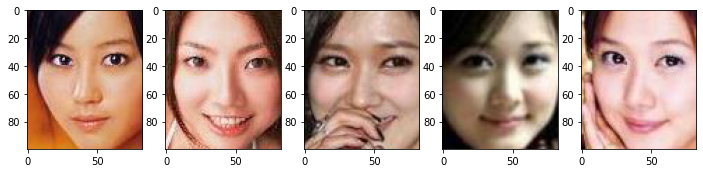

In [91]:
distractors_imgs = []
for top in top_5_distractors.indices:
    distractors_imgs.append(Image.open(os.path.join('./celebA_ir/celebA_distractors', distractors_img_names[top])))

_, axs = plt.subplots(1, 5, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(distractors_imgs, axs):
    ax.imshow(np.array(img))
plt.show()

### Построим trash query

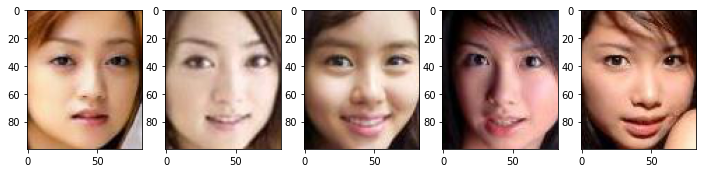

In [92]:
query_imgs = []
for top in top_5_query.indices:
    query_imgs.append(Image.open(os.path.join('./celebA_ir/celebA_query', query_img_names[top])))

_, axs = plt.subplots(1, 5, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(query_imgs, axs):
    ax.imshow(np.array(img))
plt.show()

### Построим trash from TEST

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


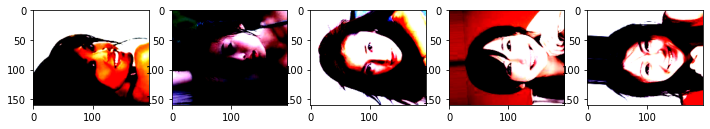

In [93]:
test_imgs = []
for i, g in enumerate(dataloaders['test']):
    if i in top_5_test.indices.tolist():
        test_imgs.append(g[0])

_, axs = plt.subplots(1, 5, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(test_imgs, axs):
    #print(np.array(img).shape)
    ax.imshow(np.array(torch.permute(img, (0, 3, 2, 1))).squeeze(0))
plt.show()

## What's next

Что еще можно сделать с этим домашним заданием:
1. Попробуйте обучить сеть на гранях, которые выровнены по-разному (или не выровнены вообще). Набор данных можно скачать здесь[текст ссылки](https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ)
2. Попробуйте смешивать разные потери во время обучения. Это часто помогает.
3. Попробуйте другие потери из [этой](https://arxiv.org/pdf/1901.05903.pdf) статьи
4. Обучите большую модель на большем наборе данных, как весь celebA, добавьте [LFW](http://vis-www.cs.umass.edu/lfw/) и другие
5. Исследуйте пространства вложений, которые вы получаете из разных моделей. Насколько хорошо вложения кластеризованы? Равномерно ли они распределены по сфере? Как вы могли бы предложить сделать это лучше?

# Обучить сеть для элайна, обучить сеть на заалайненных своей сетью лицах

Это небольшой набор данных для экспериментов с методами компьютерного зрения. В нем есть обучающий каталог, содержащий по 14-20 фотографий каждой из знаменитостей. Бен Аффлек Элтон Джон Джерри Сайнфелд Мадонна Минди Калинг В каталоге проверки есть 5 фотографий каждой знаменитости. Фотографии не были обрезаны для обеспечения постоянного соотношения сторон. С таким небольшим количеством обучающих фотографий это особенно интересный тест методов компьютерного зрения.

Ссылка на датасет:
https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset/download?datasetVersionNumber=3

In [8]:
import numpy as np
import os
import pandas as pd
import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

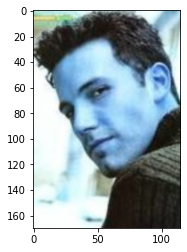

(170, 115, 3)


In [2]:
img = cv2.imread('./5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()
print(img.shape)

Функция Extract_face загружает файл изображения и возвращает извлеченное лицо в форме 160 * 160 пикселей, как это необходимо для обученной модели FaceNet. код ссылки Попробуйте Extract_face() на образце изображения. Хорошо работает

In [3]:
# извлечь одно лицо из данной фотографии
def extract_face(filename, required_size=(160, 160)):
    # загрузить изображение из файла
    image = Image.open(filename)
    # конвертировать в RGB
    image = image.convert('RGB')
    # преобразовать в массив numpy
    pixels = np.asarray(image)
    # создать детектор, используя веса по умолчанию
    detector = MTCNN()
    # распознавать лица на изображении
    results = detector.detect_faces(pixels)
    # извлечь bbox из первого лица
    x1, y1, width, height = results[0]['box']
    # отрицательные индексы пикселя в модуль
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # извлечь лицо
    face = pixels[y1:y2, x1:x2]
    # изменить размер пикселей до размера модели
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

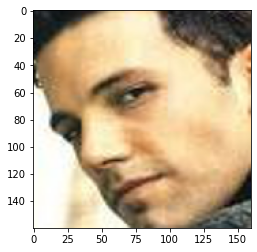

(160, 160, 3)


In [4]:
# загрузим фото и извлечем лицо
pixels = extract_face('./5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

### Применим extract_face() для всех лиц в наборе данных

In [5]:
def load_face(dir):
    faces = list()

    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

In [6]:
def load_dataset(dir):
    # list  для лиц и лейблов
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) )
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

In [9]:
# train dataset
trainX, trainy = load_dataset('./5-celebrity-faces-dataset/data/train/')
print(trainX.shape, trainy.shape)
# test dataset
testX, testy = load_dataset('./5-celebrity-faces-dataset/data/val/')
print(testX.shape, testy.shape)

loaded 21 sample for class: jerry_seinfeld
loaded 22 sample for class: mindy_kaling
loaded 19 sample for class: madonna
loaded 17 sample for class: elton_john
loaded 14 sample for class: ben_afflek
(93, 160, 160, 3) (93,)
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: mindy_kaling
loaded 5 sample for class: madonna
loaded 5 sample for class: elton_john
loaded 5 sample for class: ben_afflek
(25, 160, 160, 3) (25,)


In [10]:
# сохраним и сожмем набор данных для дальнейшего использования
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

In [11]:
# загрузим набор данных лица
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [13]:
# загрузим facenet model
facenet_model = load_model('./keras-facenet/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


Следующий шаг — стандартизация лиц и извлечение embedding vector

In [14]:
def get_embedding(model, face):
    # масштабировать значения пикселей
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # перенос лица в один образец (3 измерения в 4 измерения)
    sample = np.expand_dims(face, axis=0)
    # сделать prediction, чтобы получить embedding
    yhat = model.predict(sample)
    return yhat[0]

In [15]:
# преобразовать каждое лицо в наборе train в embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

(93, 128)


In [16]:
# преобразовать каждое лицо в наборе test в embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

(25, 128)


In [17]:
# сохранять массивы в один файл в сжатом формате
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# нормализовать входные векторы
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=100.000, test=100.000


Случайным образом выберите лицо из тестового набора для предсказания. Рассчитать достоверность

Predicted: 
['ben_afflek' 'elton_john' 'jerry_seinfeld' 'madonna' 'mindy_kaling'] 
[88.75185874  3.11471328  3.16215874  2.11583485  2.85543439]
Expected: ben_afflek


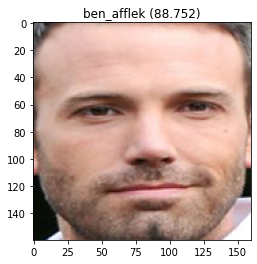

In [19]:
from random import choice
# выберем случайное лицо из тестового набора
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction для лица
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# получить имя
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# изобразим лицо
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()